### Statistical Analysis of USDA Fire Emissions Data Set (2003-2015)

### First Step - Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt, time
import matplotlib.mlab as mlab
import matplotlib.style as stl
from numpy import median
from numpy.random import randn
from scipy import stats
from sklearn import preprocessing
from pandas.plotting import scatter_matrix

sns.set(style="ticks", color_codes=True)

%matplotlib inline

### Second Step - Loading and Checking the Data

In [2]:
# Load Emissions CSV File
emstat = pd.read_csv('1_emissions_03_15_v5.24.csv')

In [3]:
# Use pandas to view the first 5 rows of the file
emstat.head(5)

,Unnamed: 0,id,year,doy,longitude,latitude,covertype,fuelcode,area_burned,prefire_fuel,...,ECO2,ECO,ECH4,EPM2.5,cwd_frac,duff_frac,fuel_moisture_class,burnday_source,BSEV,cluster_reference
0,0,0,2008,359,-81.0384,25.1958,3,1600,0.0,6220.097576,...,3347.594423,153.981344,4.499455,23.797117,0.023231,0.082115,3,81,1,2008_0
1,1,1,2008,359,-81.0404,25.1984,3,1600,62500.0,6220.097576,...,3417.260644,157.185824,4.593092,24.292355,0.022757,0.080441,3,81,2,2008_0
2,2,2,2008,359,-81.0380,25.1981,3,1600,0.0,6220.097576,...,3347.594423,153.981344,4.499455,23.797117,0.023231,0.082115,3,81,1,2008_0
3,3,4,2008,359,-81.0594,25.2035,3,1600,0.0,6220.097576,...,3347.594423,153.981344,4.499455,23.797117,0.023231,0.082115,3,81,1,2008_0
4,4,5,2008,359,-81.0570,25.2032,3,1600,62500.0,6220.097576,...,3417.260644,157.185824,4.593092,24.292355,0.022757,0.080441,3,81,2,2008_0


In [4]:
# What are the dtypes of the columns?
emstat.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5936438 entries, 0 to 5936437
Data columns (total 21 columns):
Unnamed: 0             int64
id                     int64
year                   int64
doy                    int64
longitude              float64
latitude               float64
covertype              int64
fuelcode               int64
area_burned            float64
prefire_fuel           float64
consumed_fuel          float64
ECO2                   float64
ECO                    float64
ECH4                   float64
EPM2.5                 float64
cwd_frac               float64
duff_frac              float64
fuel_moisture_class    int64
burnday_source         int64
BSEV                   int64
cluster_reference      object
dtypes: float64(11), int64(9), object(1)
memory usage: 951.1+ MB


In [5]:
# Determine the shape of the data
print("{} instances with {} features\n".format(*emstat.shape))

5936438 instances with 21 features



In [6]:
# Checking to see how many years comprise the file
print(emstat['year'].unique())

[2008 2009 2013 2007 2006 2012 2004 2010 2011 2005 2015 2014 2003]


### Description of Top-Level Key Statistics

In [7]:
# Use pandas to get the summary statistics on the data
emstat.describe()

,Unnamed: 0,id,year,doy,longitude,latitude,covertype,fuelcode,area_burned,prefire_fuel,consumed_fuel,ECO2,ECO,ECH4,EPM2.5,cwd_frac,duff_frac,fuel_moisture_class,burnday_source,BSEV
count,5.936438e+06,5.936438e+06,5.936438e+06,5.936438e+06,5.936438e+06,5.936438e+06,5.936438e+06,5.936438e+06,5.936438e+06,5.936438e+06,5.936438e+06,5.936438e+06,5.936438e+06,5.936438e+06,5.936438e+06,5.936438e+06,5.936438e+06,5.936438e+06,5.936438e+06,5.936438e+06
mean,2.968218e+06,3.536863e+06,2.009314e+03,1.729656e+02,-1.050422e+02,3.803705e+01,2.187879e+00,6.272556e+02,4.992945e+04,2.942195e+03,1.839132e+03,2.959950e+03,1.958013e+02,9.437248e+00,3.235875e+01,5.979635e-02,7.665734e-02,2.216065e+00,3.219241e+01,2.101591e+00
std,1.713702e+06,2.063816e+06,3.498660e+00,7.387416e+01,1.257599e+01,5.570617e+00,8.419668e-01,6.974256e+02,2.505276e+04,2.959327e+03,1.766329e+03,2.801465e+03,2.212442e+02,1.251171e+01,3.794615e+01,1.021607e-01,1.070490e-01,7.531982e-01,2.864382e+01,7.944718e-01
min,0.000000e+00,0.000000e+00,2.003000e+03,0.000000e+00,-1.246583e+02,2.468010e+01,1.000000e+00,1.000000e+00,0.000000e+00,3.810924e+00,3.544159e+00,5.943555e+00,2.480910e-01,9.498000e-03,3.615000e-02,0.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00
25%,1.484109e+06,1.747668e+06,2.006000e+03,1.050000e+02,-1.158255e+02,3.353330e+01,1.000000e+00,1.000000e+00,6.250000e+04,2.557803e+02,2.322198e+02,3.894326e+02,1.625538e+01,6.223490e-01,2.368642e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.500000e+01,2.000000e+00
50%,2.968218e+06,3.439456e+06,2.009000e+03,1.880000e+02,-1.072633e+02,3.753380e+01,2.000000e+00,2.000000e+00,6.250000e+04,1.468999e+03,1.204325e+03,1.944435e+03,9.261756e+01,3.545929e+00,1.349570e+01,0.000000e+00,0.000000e+00,2.000000e+00,1.500000e+01,2.000000e+00
75%,4.452328e+06,5.288928e+06,2.012000e+03,2.270000e+02,-9.629230e+01,4.274380e+01,3.000000e+00,1.220000e+03,6.250000e+04,6.424431e+03,3.569616e+03,5.728583e+03,2.958688e+02,1.087070e+01,4.572518e+01,9.194700e-02,1.527600e-01,3.000000e+00,7.700000e+01,2.000000e+00
max,5.936437e+06,7.254533e+06,2.015000e+03,3.660000e+02,-6.700630e+01,4.900280e+01,3.000000e+00,2.950000e+03,6.250000e+04,1.333751e+04,1.047759e+04,1.628218e+04,1.393520e+03,7.837240e+01,2.388891e+02,4.970340e-01,8.003240e-01,4.000000e+00,8.100000e+01,4.000000e+00


### Identifying Most Important Features

In [8]:
# A look at what the Burn Severity (BSEV) look like - with the rankings from 1 (low) to 4 (highest)
emstat['BSEV'].value_counts()

2    3353915
1    1193970
3     979974
4     408560
0         19
Name: BSEV, dtype: int64

In [9]:
# Show the data by BSEV
print(emstat.groupby('BSEV').count())

      Unnamed: 0       id     year      doy  longitude  latitude  covertype  \
BSEV                                                                          
0             19       19       19       19         19        19         19   
1        1193970  1193970  1193970  1193970    1193970   1193970    1193970   
2        3353915  3353915  3353915  3353915    3353915   3353915    3353915   
3         979974   979974   979974   979974     979974    979974     979974   
4         408560   408560   408560   408560     408560    408560     408560   

      fuelcode  area_burned  prefire_fuel  consumed_fuel     ECO2      ECO  \
BSEV                                                                         
0           19           19            19             19       19       19   
1      1193970      1193970       1193970        1193970  1193970  1193970   
2      3353915      3353915       3353915        3353915  3353915  3353915   
3       979974       979974        979974         979974

In [10]:
# These features all increase with each other - no inverse relationships
emstat[['BSEV', 'ECO2', 'area_burned', 'consumed_fuel','cwd_frac', 'duff_frac']].agg(['mean','min','max'])

,BSEV,ECO2,area_burned,consumed_fuel,cwd_frac,duff_frac
mean,2.101591,2959.950062,49929.446328,1839.132231,0.059796,0.076657
min,0.000000,5.943555,0.000000,3.544159,0.000000,0.000000
max,4.000000,16282.180633,62500.000000,10477.593715,0.497034,0.800324


### What Calendar Year has the Greatest Number of Fire Events per BSEV?

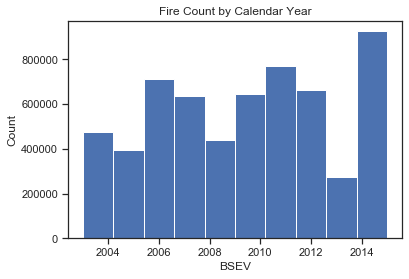

In [11]:
# Visualize the BSEV distribution by year
fig, ax = plt.subplots()
ax.hist(emstat['year'], bins=10, range = (emstat['year'].min(),emstat['year'].max()))
plt.title('Fire Count by Calendar Year')
plt.xlabel('BSEV')
plt.ylabel('Count')
plt.show()

### Focus on CY2015 - the year in our emissions data set that has the highest wildfire BSEV

In [12]:
emstat2015 = emstat[(emstat.year == 2015)]
print('There are {:,} rows'.format(len(emstat2015)))

There are 483,703 rows


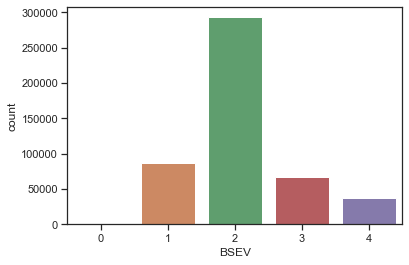

In [13]:
# We have 4 separate Burn Severity categories: 1 (not burned), 2 (light), 3(med), 4 (heavy burn)
sns.countplot(emstat2015['BSEV'],label="Count")
plt.show()

### Limiting the dataset to the state of California for processing efficiency
#### * This step reduces the number of instances from 483,703 to 224,640 

In [14]:
# Creating a variable to toggle/limit the dataset to one year within the boundaries of California 
emstat2015_ca = emstat2015[(emstat2015.latitude > 34) & (emstat2015.longitude < -114)]
emstat2015_ca[1:2]

,Unnamed: 0,id,year,doy,longitude,latitude,covertype,fuelcode,area_burned,prefire_fuel,...,ECO2,ECO,ECH4,EPM2.5,cwd_frac,duff_frac,fuel_moisture_class,burnday_source,BSEV,cluster_reference
4697366,4697366,5600950,2015,201,-124.5848,48.342,3,1300,0.0,11715.036749,...,10053.047862,860.395988,48.389188,147.496455,0.464559,0.275379,2,77,1,2015_0


In [15]:
# Reduce columns to focus on most important features
emstat2015_ca = emstat2015_ca.drop(columns=['id', 'covertype'])

In [16]:
emstat2015_ca.shape

(224640, 19)

### Statistical Correlation of Emissions Measures of Performance
#### * Part I looks at relation between features 'cwd_frac', 'duff_frac', and 'BSEV'
#### cwd = Coarse Woody Debris = Dead pieces of wood including downed, dead tree and shrub boles, large limbs, and other woody pieces that are severed from their original source of growth or are leaning more than 45 degrees from vertical.
#### duff = The layer of decomposing organic materials lying below the litter layer of freshly fallen twigs, needles,  leaves and    immediately above the mineral soil. 
#### BSEV = Burn Severity = A qualitative assessment of the heat pulse directed toward the ground during a fire. Burn severity relates to soil heating, large fuel and duff consumption, consumption of the litter and organic layer beneath trees and isolated shrubs, and mortality of buried plant parts.
#### * Part II looks at relation between features 'consumed_fuel', 'ECO2', and 'BSEV'
#### consumed_fuel = The amount of a specified fuel type or strata that is removed through the fire process
#### ECO2 = Emissions Carbon Dioxide = A greenhouse gas that enters the atmosphere through burning fossil fuels (coal, natural gas, and oil), solid waste, trees and other biological materials, and also as a result of certain chemical reactions 

In [17]:
# Correlation Analysis of key intensity indicators
x_values = emstat2015_ca['cwd_frac']
y_values = emstat2015_ca['duff_frac']
z_values = emstat2015_ca['BSEV']

correlation_matrix1 = np.corrcoef(x_values, y_values)
correlation_matrix2 = np.corrcoef(x_values, z_values)
correlation_matrix3 = np.corrcoef(y_values, z_values)
correlation_xy = correlation_matrix1[0,1]
correlation_xz = correlation_matrix2[0,1]
correlation_yz = correlation_matrix3[0,1]
r_squared1 = correlation_xy**2
r_squared2 = correlation_xz**2
r_squared3 = correlation_yz**2

print(f"R2 Correlation of Coarse Woody Debris (cwd) and BSEV: {r_squared1:.9f}")
print(f"R2 Correlation of Decomposing Organic Materials (duff) and BSEV: {r_squared2:.9f}")
print(f"R2 Correlation of duff and BSEV: {r_squared3:.9f}")

R2 Correlation of Coarse Woody Debris (cwd) and BSEV: 0.795519577
R2 Correlation of Decomposing Organic Materials (duff) and BSEV: 0.005187209
R2 Correlation of duff and BSEV: 0.004062486


In [18]:
# Correlation Analysis of key intensity indicators
x_values = emstat2015_ca['consumed_fuel']
y_values = emstat2015_ca['ECO2']
z_values = emstat2015_ca['BSEV']

correlation_matrix1 = np.corrcoef(x_values, y_values)
correlation_matrix2 = np.corrcoef(x_values, z_values)
correlation_matrix3 = np.corrcoef(y_values, z_values)
correlation_xy = correlation_matrix1[0,1]
correlation_xz = correlation_matrix2[0,1]
correlation_yz = correlation_matrix3[0,1]
r_squared1 = correlation_xy**2
r_squared2 = correlation_xz**2
r_squared3 = correlation_yz**2

print(f"R2 Correlation of consumed_fuel and ECO2: {r_squared1:.9f}")
print(f"R2 Correlation of consumed_fuel and BSEV: {r_squared2:.9f}")
print(f"R2 Correlation of ECO2 and BSEV: {r_squared3:.9f}")

R2 Correlation of consumed_fuel and ECO2: 0.999881809
R2 Correlation of consumed_fuel and BSEV: 0.083524539
R2 Correlation of ECO2 and BSEV: 0.084090304


### Following Pair Plot shows pairwise relationships between four primary features


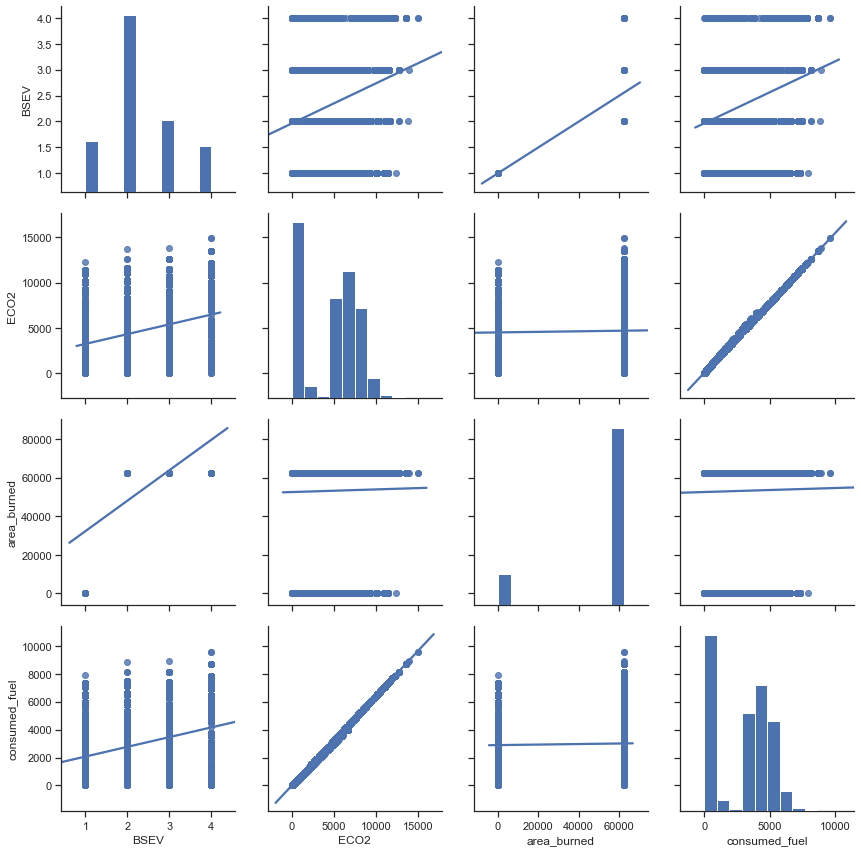

In [19]:
g = sns.pairplot(emstat2015_ca, height=3, vars=['BSEV','ECO2','area_burned', 'consumed_fuel'], kind="reg")

### Following Joint Plot shows pairwise relationships between two primary features

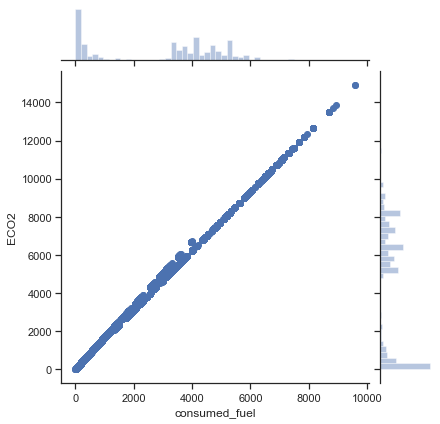

In [20]:
g = sns.jointplot("consumed_fuel", "ECO2", emstat2015_ca)

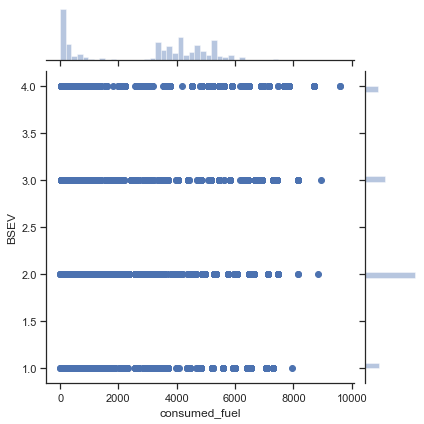

In [21]:
g = sns.jointplot("consumed_fuel", "BSEV", emstat2015_ca)

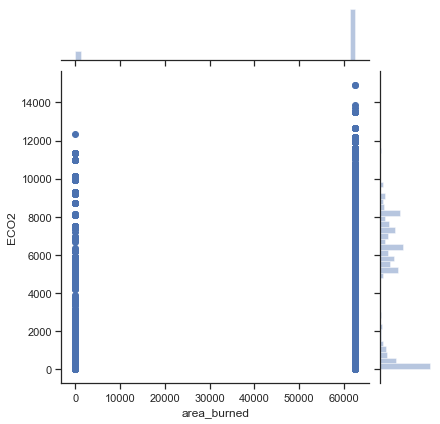

In [22]:
g = sns.jointplot("area_burned", "ECO2", emstat2015_ca)

### Following Regression Plots shows multiple relationships between different pairings of the dataset features

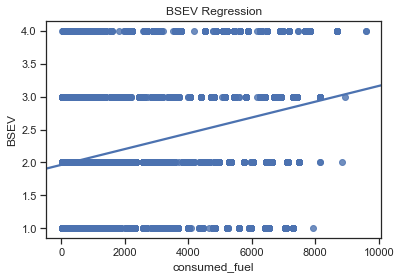

In [23]:
sns.regplot(x="consumed_fuel", y="BSEV", data=emstat2015_ca,  ci=None, x_jitter=.05)
plt.title("BSEV Regression")
plt.show()

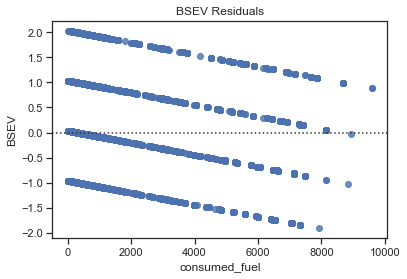

In [24]:
sns.residplot(x="consumed_fuel", y="BSEV", data=emstat2015_ca)
plt.title("BSEV Residuals")
plt.show()

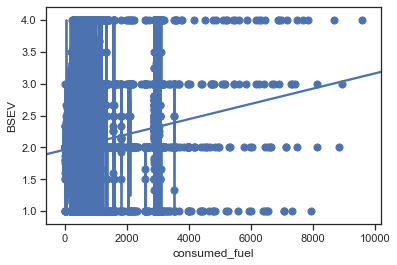

In [25]:
sns.regplot(x='consumed_fuel', y='BSEV', data=emstat2015_ca, x_estimator=np.mean)

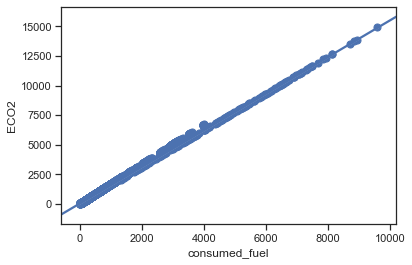

In [26]:
sns.regplot(x='consumed_fuel', y='ECO2', data=emstat2015_ca, x_estimator=np.mean)

### Scatter Plot to show relationship between emissions features

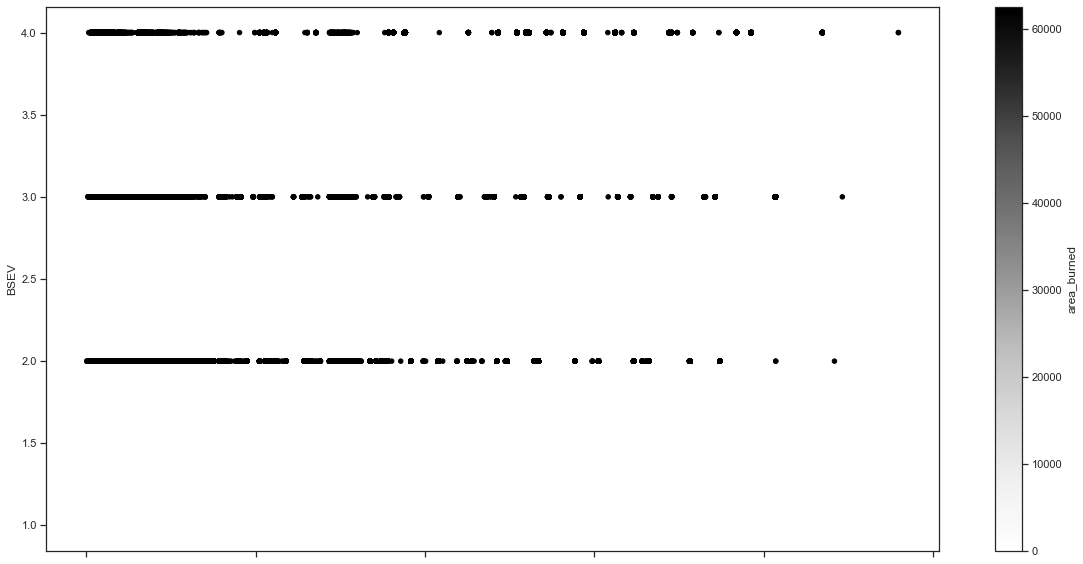

In [27]:
emstat2015_ca.plot(kind='scatter', x='consumed_fuel', y='BSEV', c='area_burned',figsize=[20,10])

### Scatter Plot Matrix to show multiple visualizations between emissions features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C9AEA68BC8>,
      dtype=object)

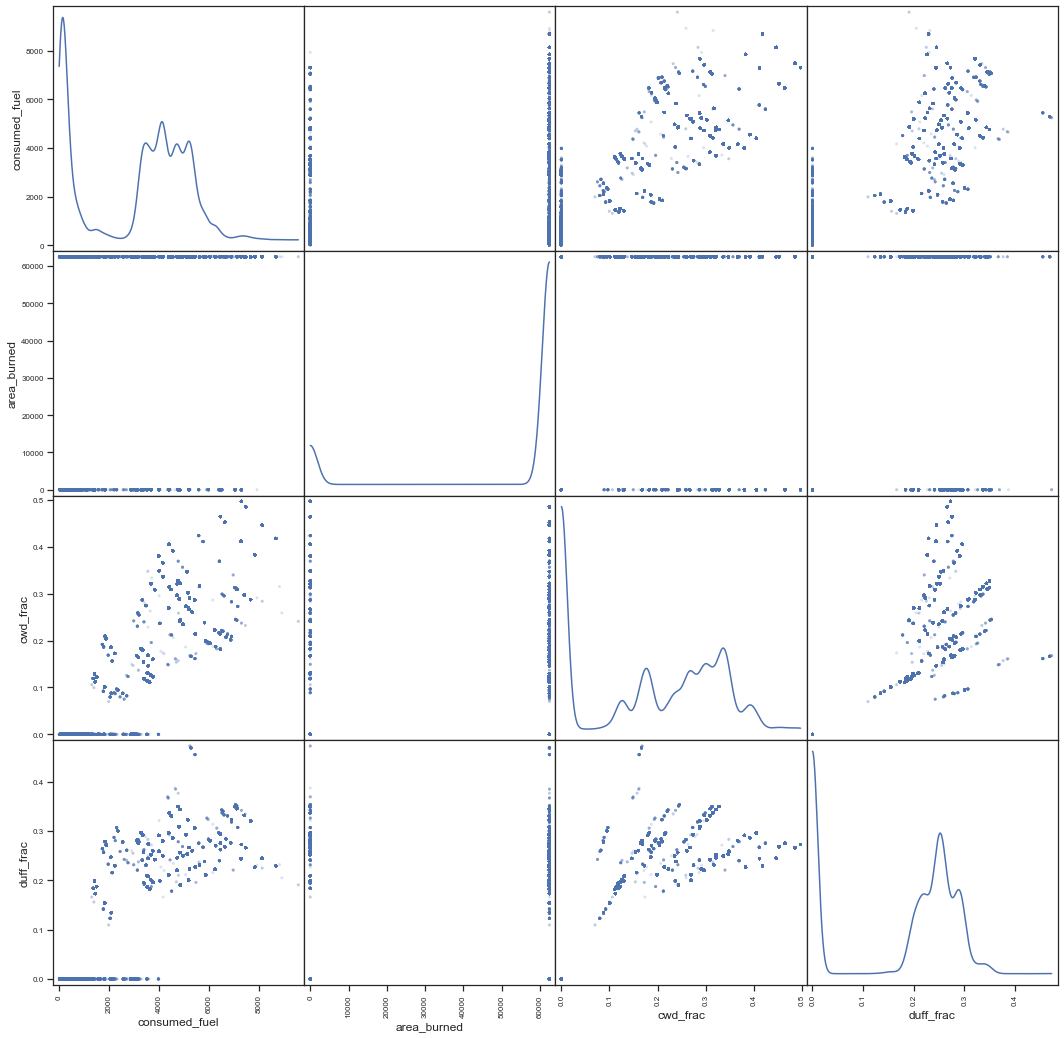

In [28]:
areas = emstat2015_ca[['consumed_fuel','area_burned','cwd_frac','duff_frac']]
scatter_matrix(areas, alpha=0.2, figsize=(18,18), diagonal='kde')

### Visualizing the distribution with two Kernal Density Estimates

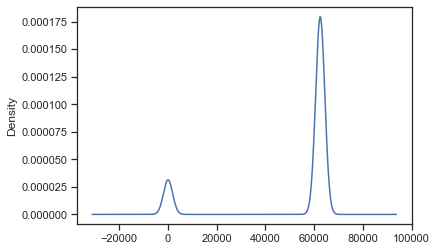

In [29]:
emstat2015_ca['area_burned'].plot(kind='kde')

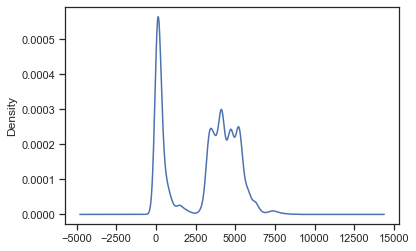

In [30]:
emstat2015_ca['consumed_fuel'].plot(kind='kde')

### Time Series Plot to show trends between four types of emissions green house gases

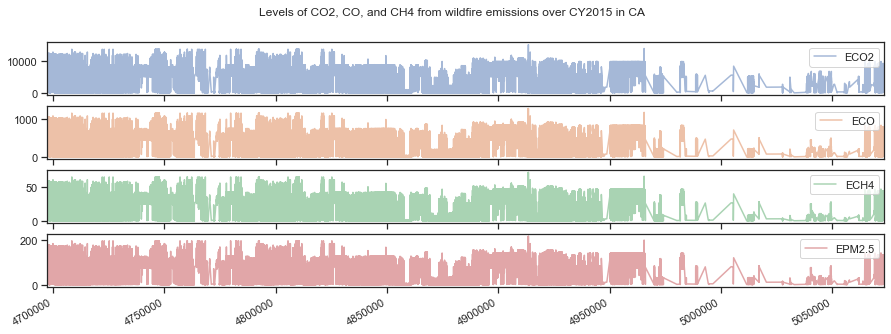

In [31]:
axes = emstat2015_ca[["ECO2", "ECO", "ECH4", "EPM2.5"]].plot(
    alpha=0.5, 
    x_compat=True,
    subplots=True,
    figsize=(15, 5),
    title="Levels of CO2, CO, and CH4 from wildfire emissions over CY2015 in CA"
)

### Limiting the dataset again - this time within the state of California for processing efficiency
#### * Compressed the latitude and longitude to reflect half of state
#### * This step reduces the number of instances from 224,640 to 64,773 

In [32]:
# Removing select columns to shorten the boxplot distribution
emstat2015_ca2 = emstat2015_ca.drop(['Unnamed: 0', 'cwd_frac', 'duff_frac', 'ECO', 'ECH4', 'EPM2.5'], 1)

In [33]:
emstat2015_ca3 = emstat2015_ca2[(emstat2015_ca2.latitude > 32) & (emstat2015_ca2.longitude < -120)]
emstat2015_ca3[1:2]

,year,doy,longitude,latitude,fuelcode,area_burned,prefire_fuel,consumed_fuel,ECO2,fuel_moisture_class,burnday_source,BSEV,cluster_reference
4697366,2015,201,-124.5848,48.342,1300,0.0,11715.036749,6469.142768,10053.047862,2,77,1,2015_0


In [34]:
emstat2015_ca3.shape

(64773, 13)

### Boxplot showing data distribution - scale and quartiles - among key features

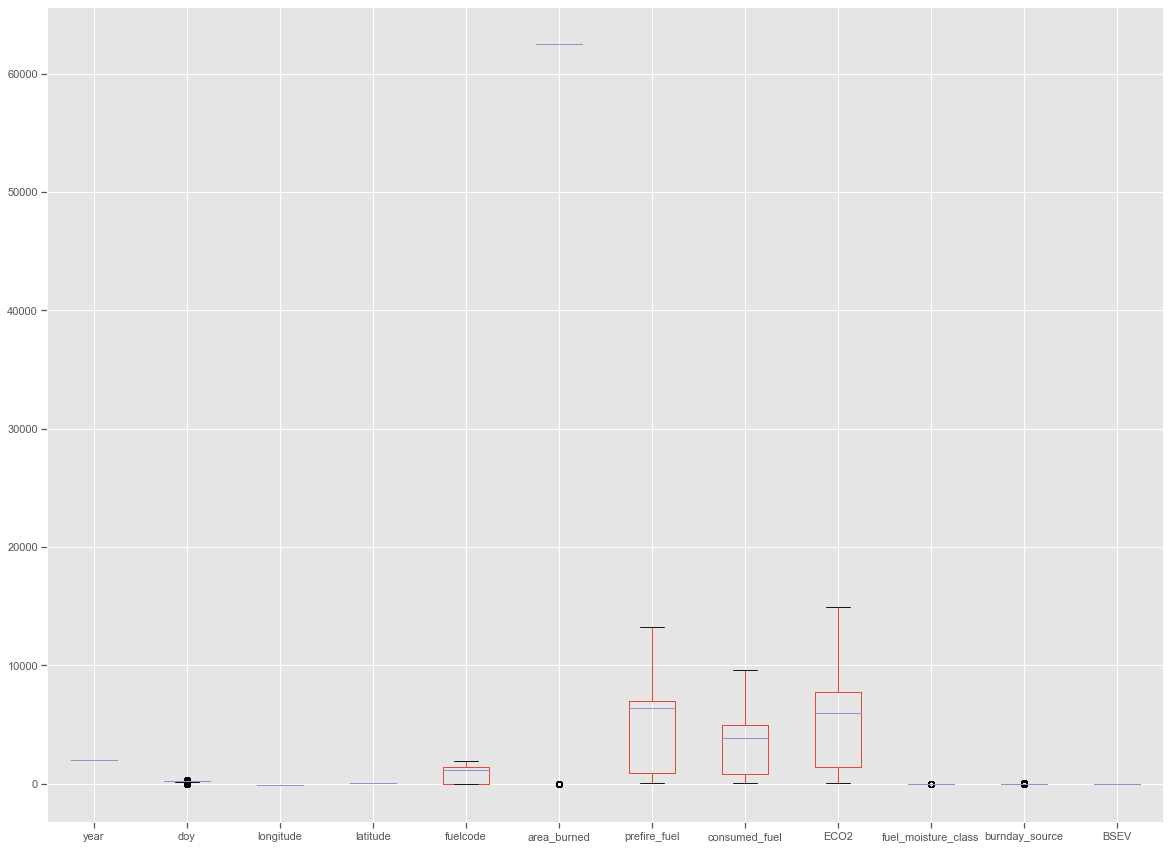

In [35]:
#draw box plot of see range of the data
matplotlib.style.use('ggplot')
emstat2015_ca3.plot(kind='box',figsize=(20,15))

### Visualizing emissions data points for half of state of California

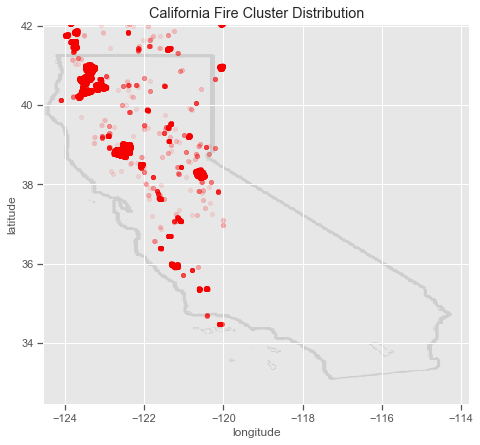

In [36]:
# California Fire Distribution Map
import matplotlib.image as mpimg
california_img=mpimg.imread('CaliforniaMapOutline.gif')
emstat2015_ca3.plot(kind="scatter", x="longitude", y="latitude", c= "red", figsize=(10,7), alpha=0.1)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.1)
plt.title('California Fire Cluster Distribution') 
plt.show()